In [113]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tqdm import tqdm

import model
import data_loader
import loss
import tester
import utils

In [101]:
root_path = '/home/renyan/ossdata/massachusetts-roads-dataset/'
road_path = root_path + "tiff_select2_parts_16/"
DIR_CHECKPOINT = 'checkpoints/'
TEST_SAVE_PATH = '/home/renyan/road-extraction/predict_result/'

In [102]:
INPUT_SIZE, OUTPUT_SIZE = 256, 256
test_dataset = data_loader.RoadDataset(road_path, INPUT_SIZE, OUTPUT_SIZE, data_class = 'test')

test dataset set: 784 pairs


In [103]:
net = model.DLinkNet34()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tt = tester.Tester(net = net, 
                   device = device, 
                   dir_stat = 'v2_dlinknet34_epoch20.pth', 
                   test_dataset = test_dataset,
                   threshold = 0.5,
                   save_path = TEST_SAVE_PATH, 
                   dir_checkpoint = DIR_CHECKPOINT)

Tester with net para in v2_dlinknet34_epoch20.pth is ready 
(threshold = 0.5, 784 pairs in test dataset)


In [104]:
img, lbl = next(iter(tt.test_dataset))

change threshold from 0.5 to 0.5


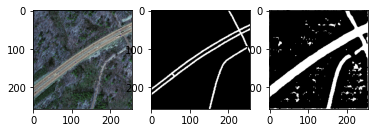

In [216]:
tt.set_threshold(0.5)
tt.test_idx(4)

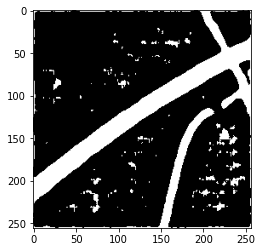

In [217]:
tmp = utils.change_tensor_to_plot(tt.pred)
plt.imshow(tmp)

In [218]:
# t = torch.cat([tt.pred]*3).permute(1, 2, 0).cpu()
# plt.imshow(t[0:50,0:50,:])

In [219]:
ret, img = cv2.threshold(np.array(tmp[:,:,0]), 0.5, 255, cv2.THRESH_BINARY) # 二值化
contours, _ = cv2.findContours(img.astype('uint8'), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [220]:
n = len(contours)  # 轮廓的个数
n

144

In [221]:
cv_contours = []
for contour in tqdm(contours):
    area = cv2.contourArea(contour)
    areas.append(area)
    if area <= 1000:
        cv_contours.append(contour)

100%|██████████| 144/144 [00:00<00:00, 142582.57it/s]


In [222]:
len(cv_contours)

142

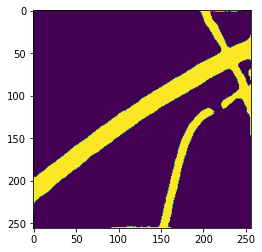

In [223]:
cv2.fillPoly(img, cv_contours, (0, 0, 0))
plt.imshow(img)